> 现在的ODE结果存在错误，可能Richards方程写的不对

In [1]:
include("main_ode.jl")

# n = 100
u0 = fill(0.1, n) |> collect # Example initial soil moisture profile
tspan = (0.0, 0.8 * 3600)  # Time span for the simulation
p = (; dz, dt, θ0, ψ0, z, z₊ₕ, K=zeros(n), ψ=zeros(n), param=param)

(dz = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], dt = 5, θ0 = 0.267, ψ0 = -20.921265200082487, z = [-0.5, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5, -9.5  …  -140.5, -141.5, -142.5, -143.5, -144.5, -145.5, -146.5, -147.5, -148.5, -149.5], z₊ₕ = [-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -9.0, -10.0  …  -141.0, -142.0, -143.0, -144.0, -145.0, -146.0, -147.0, -148.0, -149.0, -150.0], K = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ψ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], param = (θs = 0.287, θr = 0.075, Ks = 0.009444444444444445, α = 0.027, n = 3.96, m = 1))

In [5]:
prob = ODEProblem(soil_moisture_transport, u0, tspan, p);
@time sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6, saveat=200)
# plot(sol)

  0.870280 seconds (89 allocations: 49.422 KiB)


retcode: Success
Interpolation: 1st order linear
t: 16-element Vector{Float64}:
    0.0
  200.0
  400.0
  600.0
  800.0
 1000.0
 1200.0
 1400.0
 1600.0
 1800.0
 2000.0
 2200.0
 2400.0
 2600.0
 2800.0
 2880.0
u: 16-element Vector{Vector{Float64}}:
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
 [0.2667087512420861, 0.26549829309553974, 0.2641586355784022, 0.2626814433966233, 0.26104599656508365, 0.2592314443808932, 0.25721234825788764, 0.2549589151801027, 0.25243572006068904, 0.24960047904161844  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
 [0.26686797969641696, 0.2663019961197735, 0.26570193021328437, 0.26505664115612937, 0.26436506643250396, 0.26362235971534864, 0.26282425499021006, 0.2619656530311519, 0.2610409384115326, 0.26004378162922664  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
 [0.2669252878505652, 0.26659467654554264, 0.26625189980357183, 0.265885885635711, 0.26549861321159857, 0.26508758076322125, 0

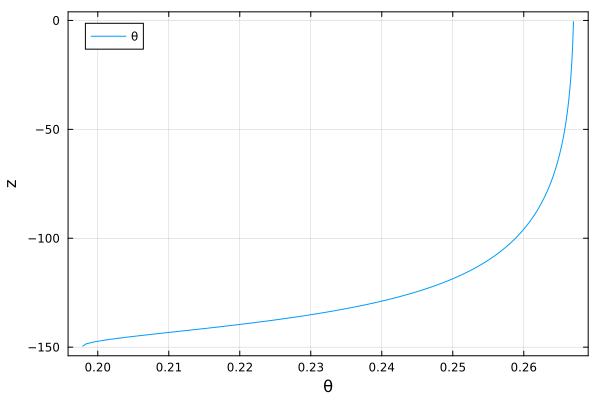

In [3]:
gr(; framestyle=:box)
_u = sol.u[end]
ψ = van_genuchten_ψ.(_u; param)
p1 = plot(sol.u[end], z; xlabel="θ", ylabel="z", label="θ")
# p2 = plot(ψ, z; xlabel="ψ", ylabel="z", label="ψ")
# plot(p1, p2)

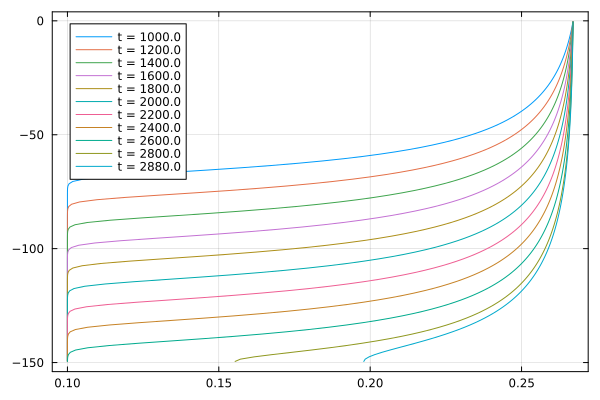

In [4]:
fig = plot()
for i in 5:length(sol.u)-1
  _u = sol.u[i+1]
  _t = sol.t[i+1]
  plot!(fig, _u, z; label="t = $_t")
end
# _u = cat(sol.u..., dims=2)
fig